In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
from keras.metrics import binary_crossentropy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('USCensusTraining_final2.csv')

In [3]:
df.head()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,<=50K.,>50K.
0,0.031014,-1.151188,1.174684,0.0,0.0,-0.191583,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.840117,-1.090155,1.174684,0.0,0.0,-1.405652,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.042541,0.303594,-0.458489,0.0,0.0,-0.191583,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1.060782,0.504492,-1.275076,0.0,0.0,-0.191583,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,-0.778090,1.596531,1.174684,0.0,0.0,-0.191583,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,<=50K.,>50K.
count,2.500000e+04,2.500000e+04,2.500000e+04,25000.0,25000.0,2.500000e+04,25000.000000,25000.00000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-2.481215e-16,-2.735590e-17,1.381295e-16,0.0,0.0,-2.714273e-16,0.030000,0.06496,0.000200,0.695400,...,0.002560,0.001680,0.000600,0.000480,0.896840,0.017800,0.002000,0.000440,0.760640,0.239360
std,1.000020e+00,1.000020e+00,1.000020e+00,0.0,0.0,1.000020e+00,0.170591,0.24646,0.014141,0.460247,...,0.050533,0.040954,0.024488,0.021904,0.304174,0.132227,0.044678,0.020972,0.426701,0.426701
min,-1.587193e+00,-1.838200e+00,-2.295809e+00,0.0,0.0,-1.405652e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.780898e-01,-7.252011e-01,-4.584889e-01,0.0,0.0,-1.915832e-01,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.160961e-01,-8.917494e-02,-5.019558e-02,0.0,0.0,-1.915832e-01,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.930074e-01,5.270301e-01,7.663911e-01,0.0,0.0,6.177958e-01,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.899653e+00,2.405377e+00,2.399565e+00,0.0,0.0,1.831864e+00,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 103 entries, age to >50K.
dtypes: float64(6), int64(97)
memory usage: 19.6 MB


In [6]:
df.columns[101]

'<=50K.'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,0:100],
    df.iloc[:,[-2,-1]],
    test_size=0.2,
    random_state=42,
    stratify=df.iloc[:,[-2,-1]]
)

In [92]:
model = Sequential()
model.add(Input(shape=(100,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer=RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [93]:
y_train_single = np.argmax(y_train, axis=1)
history = model.fit(X_train, y_train_single, batch_size=32, epochs=50, verbose=0, validation_split=0.2)

In [94]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

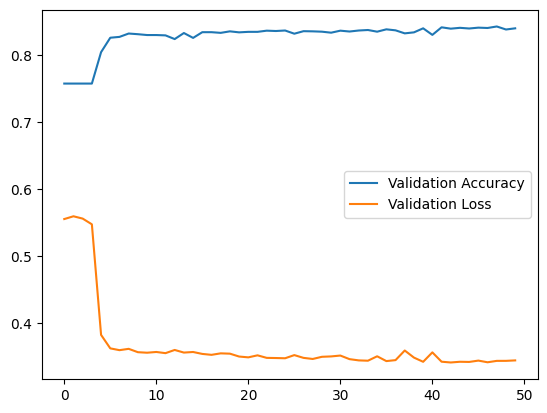

In [95]:
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [96]:
y_test_single = np.argmax(y_test, axis=1)
model.evaluate(X_test, y_test_single)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8414 - loss: 0.3462


[0.34513431787490845, 0.8465999960899353]

In [97]:
preds = model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
preds

array([[0.01670446],
       [0.05147142],
       [0.28909948],
       ...,
       [0.0085744 ],
       [0.01738648],
       [0.02441626]], dtype=float32)

In [99]:
confusion_matrix(y_test_single, np.round(preds))

array([[3614,  189],
       [ 578,  619]])

In [100]:
fpr, tpr, thresholds = roc_curve(y_test_single, preds)
roc_auc = auc(fpr, tpr)

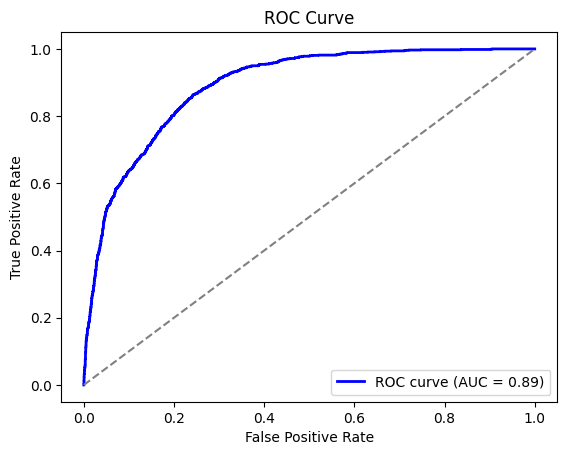

In [101]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()